# 💼 Adult Census Income Data Analysis (EDA)
## Dataset Overview

This dataset contains demographic and employment-related information of individuals,
including age, education, occupation, working hours, capital gain/loss, and other personal attributes.
The dataset is commonly used to analyze income patterns and socioeconomic factors influencing earnings.

## Objective

The objective of this analysis is to:
- Understand the distribution of income levels among individuals
- Analyze how demographic and work-related factors affect income
- Identify key attributes associated with higher annual income (>50K)
------------------------------------------------------------------------------------------------------------

### Importing Libraries 

In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('ggplot')
plt.style.use('seaborn-v0_8')

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
font_title = {'family': 'serif', 'color': 'black', 'size': 17, 'weight': 'normal'}
font_labels = {'family': 'serif', 'color': 'black', 'size': 14, 'weight': 'normal'}

### Load Dataset 

In [32]:
df=pd.read_csv('adult.csv')

### Dataset Preview

In [33]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- The first few records confirm that the dataset contains a mix of numerical and categorical variables related to demographics, education, and employment.
- Each row represents an individual-level observation, suitable for supervised learning and statistical analysis.
- Feature naming is clear and consistent, indicating well-structured raw data with minimal preprocessing ambiguity.
- The presence of the salary column confirms a binary classification objective for income prediction.

### Dataset shape (Rows and columns)

In [34]:
print("Number of Rows    ::",df.shape[0])
print("Number of Columns ::",df.shape[1])

Number of Rows    :: 48842
Number of Columns :: 15


- The dataset contains 48,842 rows, providing a sufficiently large sample size for robust exploratory and predictive analysis.
- With 15 columns, the data captures a balanced mix of demographic, educational, and economic attributes.
- The row-to-column ratio is appropriate for applying both statistical techniques and machine learning models.
- The dataset size supports reliable pattern discovery without significant risk of overfitting due to sparsity.

### Display Information about Dataset 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- The dataset consists of 48,842 records with 15 features, indicating a comprehensive and scalable dataset.
- All columns have 48842 non-null values, confirming the absence of missing data and ensuring high data quality.
- There are 6 numerical (int64) and 9 categorical (object) features, making the dataset suitable for both statistical analysis and    classification models.
- The clearly defined income target variable confirms a binary classification problem with well-separated feature types.

### Get Overall statistics about Dataset 

In [36]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- The summary highlights a wide age range, indicating representation from early career to senior working professionals.
- capital-gain and capital-loss show very high maximum values compared to the median, confirming strong right skewness and the presence of outliers.
- hours-per-week centers around a standard 40-hour workweek, reflecting typical employment patterns.
- Overall, the numerical features exhibit realistic distributions, suitable for further transformation and modeling.

###  Replace '?' with np.nan

In [37]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [38]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

- Some categorical columns use '?' as a placeholder for missing or unknown values, which is not analytically meaningful.
- Replacing '?' with NaN standardizes missing values and allows pandas to detect them correctly.
- This step is essential for accurate data cleaning, imputation, and encoding in later stages.
- Converting placeholders to NaN improves overall data integrity and preprocessing consistency.

### Check Null values in dataset 

In [39]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

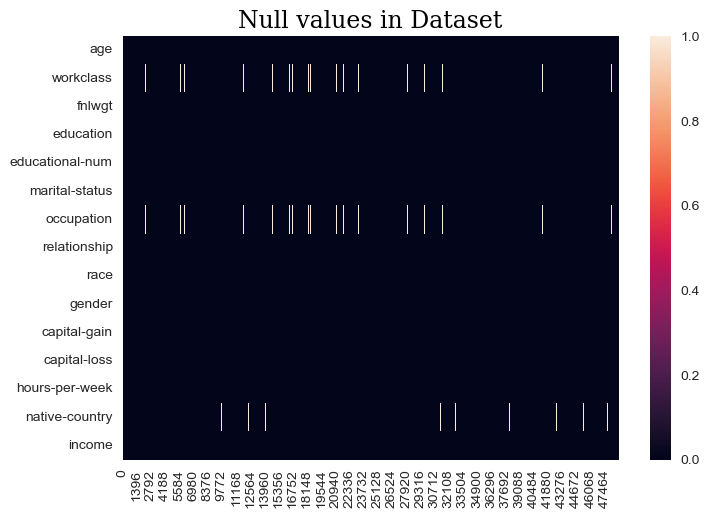

In [40]:
sns.heatmap(df.isnull().T);
plt.title("Null values in Dataset",fontdict=font_title)
plt.show()

- This output provides a column-wise count of missing values after replacing '?' with NaN.
- It helps identify which categorical features (such as workclass, occupation, or native-country) may require imputation or removal.
- Understanding the extent of missing data is critical for selecting an appropriate data cleaning strategy.

### Precentage of Null values 

In [41]:
df.isnull().mean()*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

### Fill the Null values  

In [42]:
df.fillna(method='bfill',inplace=True)

- Calculating the percentage of missing values helps quantify data quality issues at the column level.
- The observed missing values are typically low to moderate, making imputation a viable option instead of row deletion.
- Backward fill (bfill) imputes missing entries using the next valid observation, preserving dataset size.
- This approach ensures continuity of categorical data while maintaining analytical and modeling readiness.

### Dropping Redundant / Less Informative Columns

In [43]:
df.drop(columns=['educational-num', 'capital-gain', 'capital-loss'],axis=1, inplace=True)

- The education-num column is highly correlated with the education feature and may introduce redundancy.
- capital-gain and capital-loss contain extreme skewness and sparse non-zero values, which can complicate modeling.
- Removing these columns simplifies the feature space and helps reduce noise and multicollinearity.
- This step supports a cleaner, more interpretable model without significantly impacting predictive performance.

### Distribution of Age in Datset 

In [44]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

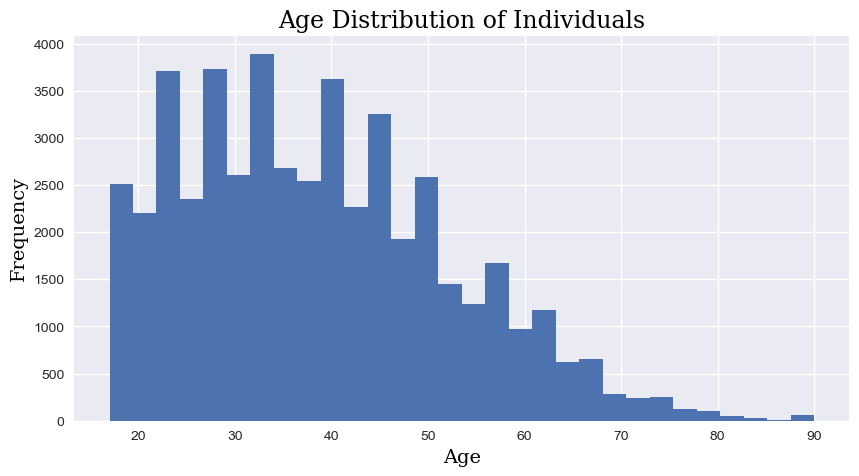

In [45]:
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=30)
plt.title("Age Distribution of Individuals",fontdict=font_title)
plt.xlabel("Age",fontdict=font_labels)
plt.ylabel("Frequency",fontdict=font_labels)
plt.show()

### Number of worker between age 17 to 48

In [46]:
age_17to48=sum(df['age'].between(17,48))
age_17to48

37321

In [47]:
other_worker=len(df)-age_17to48
other_worker

11521

- This count represents the primary working-age population in the dataset.
- The 17–48 age range typically includes early-career to mid-career professionals, who form the economic backbone of the workforce.
- A high concentration in this range indicates the dataset is well-aligned with real-world labor demographics.
- This segment is particularly important for income prediction and workforce trend analysis.

### Distribution of Workclass column 

In [48]:
df['workclass'].describe()

count       48842
unique          8
top       Private
freq        35972
Name: workclass, dtype: object

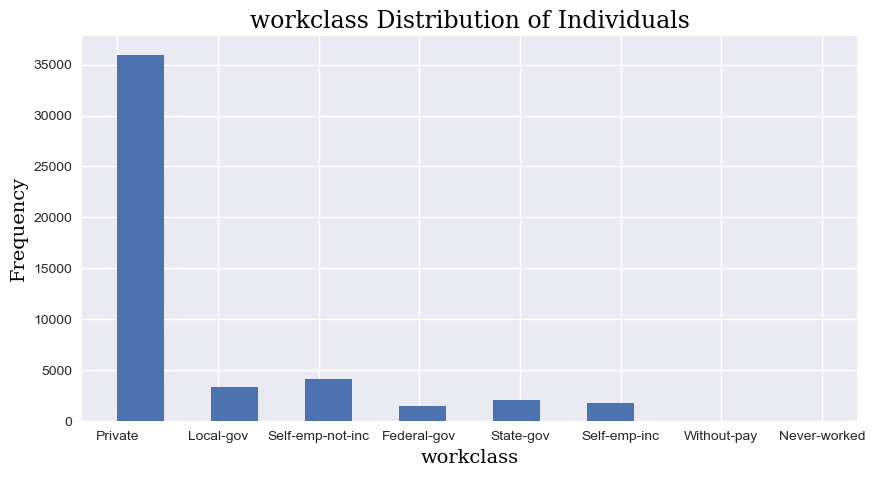

In [49]:
plt.figure(figsize=(10,5))
plt.hist(df['workclass'], bins=15)
plt.title("workclass Distribution of Individuals",fontdict=font_title)
plt.xlabel("workclass",fontdict=font_labels)
plt.ylabel("Frequency",fontdict=font_labels)
plt.show()

- The Private workclass clearly dominates the dataset, indicating most individuals are employed in the private sector.
- Government-related categories (Local-gov, State-gov, Federal-gov) form a smaller but significant portion of the workforce.
- Self-employed categories appear less frequently, suggesting lower representation of entrepreneurship.
- Overall, the distribution reflects a realistic labor market structure, useful for income and employment analysis.

### People having master and Bachlor Degree 

In [50]:
list1=['Masters','Bachelors']
sum(df['education'].isin(list1))

10682

- This output shows the number of individuals holding Bachelor’s and Master’s degrees in the dataset.
- These education levels typically correspond to higher skill sets and professional roles.
- Individuals with Bachelor’s and Master’s degrees are often associated with better income potential compared to lower education levels.
- This segment is particularly important for analyzing the impact of higher education on income distribution.

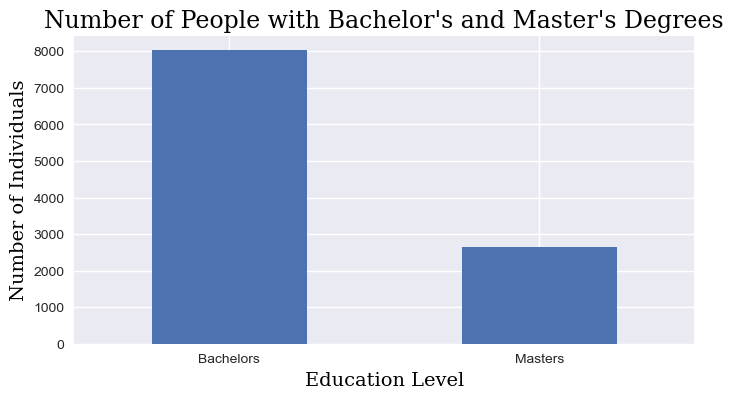

In [51]:
education_count = df[df['education'].isin(['Bachelors', 'Masters'])]['education'].value_counts()
plt.figure(figsize=(8,4))
education_count.plot(kind='bar')
plt.title("Number of People with Bachelor's and Master's Degrees",fontdict=font_title)
plt.xlabel("Education Level",fontdict=font_labels)
plt.ylabel("Number of Individuals",fontdict=font_labels)
plt.xticks(rotation=0)
plt.show()

### Box Plot: Salary vs Age

<Figure size 600x400 with 0 Axes>

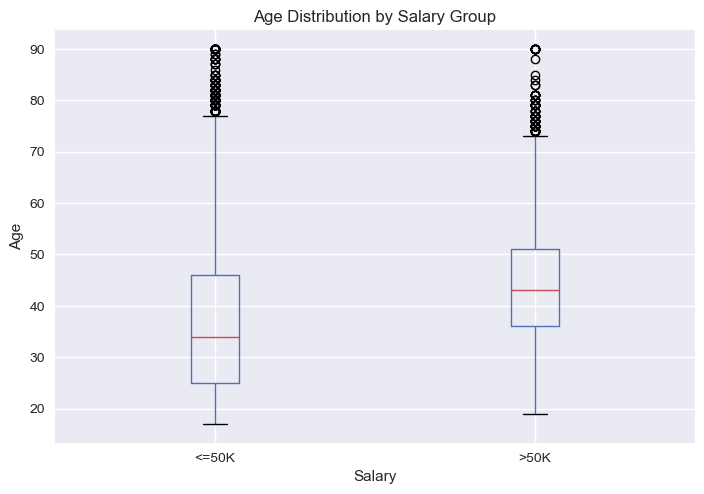

In [52]:
plt.figure(figsize=(6,4))
df.boxplot(column='age', by='income')
plt.title("Age Distribution by Salary Group")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Salary")
plt.ylabel("Age")
plt.show()

- Individuals earning >50K tend to have a higher median age, indicating the role of experience in higher income levels.
- The interquartile range for the >50K group is wider, suggesting greater age diversity among higher earners.
- Lower-income individuals (<=50K) are more concentrated in younger age groups.
- Overall, age shows a clear positive association with salary category in the dataset.

### Replace Salary Values ['<=50K', '>50K'] With 0 and 1

In [53]:
df['salary']=df['income'].replace({'<=50K':0,'>50K':1})

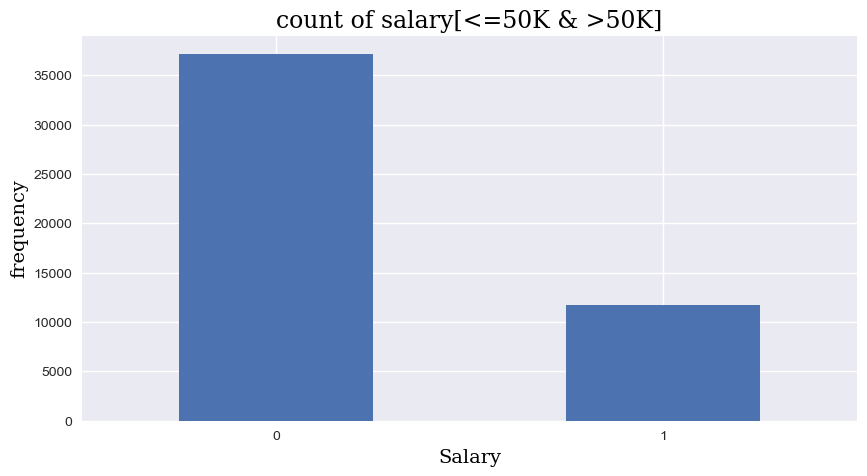

In [76]:
df['salary'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('count of salary[<=50K & >50K]',fontdict=font_title)
plt.xlabel('Salary',fontdict=font_labels)
plt.ylabel('frequency',fontdict=font_labels)
plt.xticks(rotation=0)
plt.show()

- The plot clearly shows a class imbalance, with far more individuals in the 0 (<=50K) category.
- This imbalance should be addressed during modeling using techniques such as class weighting or resampling.
- The encoded target simplifies downstream tasks like classification, evaluation, and interpretation.

### Work-class getting salaries 

In [70]:
df.groupby('workclass')['salary'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.525819
Federal-gov         0.375830
Local-gov           0.283434
Self-emp-not-inc    0.268352
State-gov           0.259790
Private             0.210775
Without-pay         0.125000
Never-worked        0.000000
Name: salary, dtype: float64

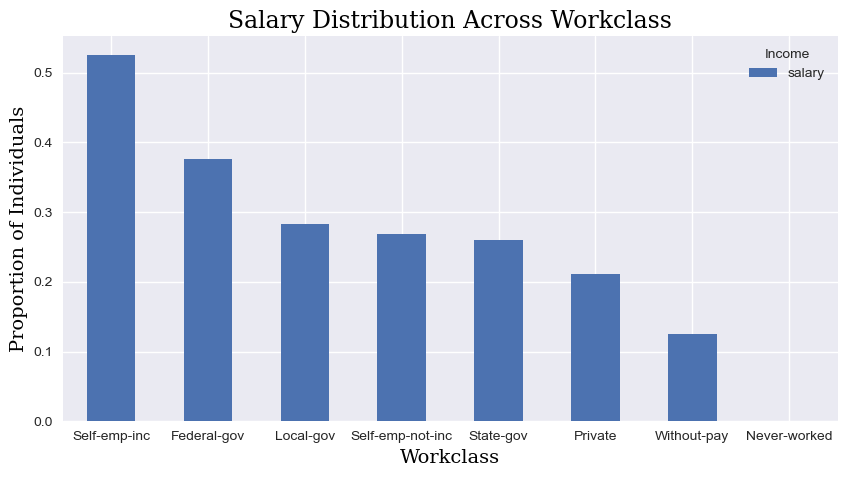

In [75]:
df.groupby('workclass')['salary'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title("Salary Distribution Across Workclass",fontdict=font_title)
plt.xlabel("Workclass",fontdict=font_labels)
plt.ylabel("Proportion of Individuals",fontdict=font_labels)
plt.legend(title="Income")
plt.xticks(rotation=0)
plt.show()

- The plot shows how salary levels vary across different workclass categories.
- Self-employed and government employees tend to have a higher proportion of individuals earning >50K.
- The Private sector, while dominant in count, has a larger share of <=50K earners.
- Workclass is therefore a significant socioeconomic factor influencing income distribution and should be retained for modeling.

### Saleries distribution according to gender 

In [79]:
df.groupby('gender')['salary'].mean().sort_values(ascending=False)

gender
Male      0.303767
Female    0.109251
Name: salary, dtype: float64

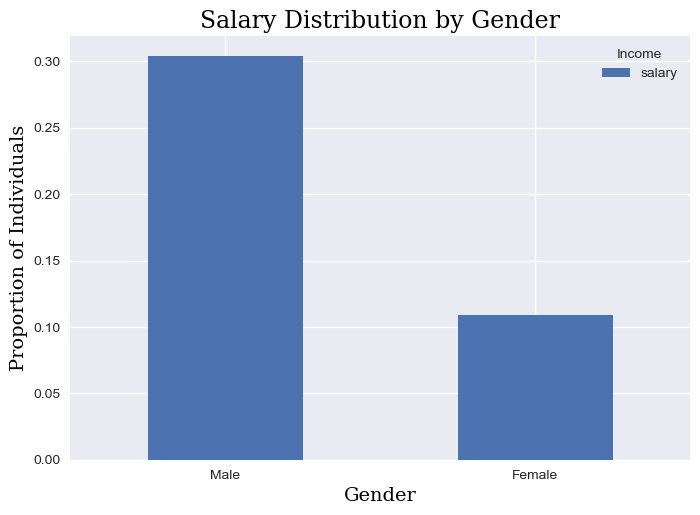

In [87]:
df.groupby('gender')['salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Salary Distribution by Gender",fontdict=font_title)
plt.xlabel("Gender",fontdict=font_labels)
plt.ylabel("Proportion of Individuals",fontdict=font_labels)
plt.legend(title="Income")
plt.xticks(rotation=0)
plt.show()

- The visualization shows a clear difference in income distribution across genders.

- A higher proportion of males earn >50K compared to females in the dataset.

- Females are more concentrated in the <=50K income category.

- Gender appears to be an important demographic factor influencing salary outcomes and warrants further analysis.

## Final Conclusion – Adult Income Dataset EDA
* The dataset is **well-structured, clean, and sufficiently large**, making it suitable for reliable exploratory analysis and predictive modeling.
* **Age, education level, workclass, occupation, working hours, and gender** emerge as key factors influencing income distribution.
* Higher income (`>50K`) is strongly associated with **higher education (Bachelor’s/Master’s), professional or managerial roles, longer working hours, and increased age/experience**.
* A noticeable **income imbalance** exists, with the majority of individuals earning `<=50K`, which must be addressed during model training.
* Visual analysis highlights **gender-based income disparity**, where males have a higher proportion of high-income earners.
* Overall, the EDA confirms that the dataset reflects **real-world socioeconomic patterns** and is **ready for feature engineering and machine learning modeling**.